<a href="https://colab.research.google.com/github/ChathuminiDisanayaka/RM/blob/main/Final_Random_Forest_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import normalize

In [99]:
#Import the dataset 
data ="/content/drive/My Drive/ML/ionosphere.csv"
df = pd.read_csv(data,header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,Signal1,Signal2,Signal3,Signal4,Signal5,Signal6,Signal7,Signal8,Signal9,Signal10,...,Signal26,Signal27,Signal28,Signal29,Signal27,Signal28,Signal29,Signal30,Signal31,Class
1,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,1
2,1,0,1,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,0
3,1,0,1,-0.03365,1,0.00485,1,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,1
4,1,0,1,-0.45161,1,1,0.71216,-1,0,0,...,0.90695,0.51613,1,1,-0.20099,0.25682,1,-0.32382,1,0


In [100]:
df.describe() #Stats of each column

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
count,352,352,352,352,352,352,352,352,352,352,...,352,352,352,352,352,352,352,352,352,352
unique,3,2,220,270,205,260,232,261,245,268,...,275,257,282,245,267,244,264,246,264,3
top,1,0,1,0,1,0,1,0,1,0,...,-1,1,-1,1,0,1,0,0,0,1
freq,313,351,95,30,96,46,71,39,64,39,...,31,88,40,57,33,58,36,48,51,225


In [101]:
pd.isna(df).any() #Check for missing values

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
16    True
17    True
18    True
19    True
20    True
21    True
22    True
23    True
24    True
25    True
26    True
27    True
28    True
29    True
30    True
31    True
32    True
33    True
34    True
dtype: bool

In [102]:
data = df.dropna() #Remove null values
print(data)
pd.isna(data).any()

          0        1        2         3        4         5         6   \
0    Signal1  Signal2  Signal3   Signal4  Signal5   Signal6   Signal7   
1          1        0  0.99539  -0.05889  0.85243   0.02306   0.83398   
2          1        0        1  -0.18829  0.93035  -0.36156  -0.10868   
3          1        0        1  -0.03365        1   0.00485         1   
4          1        0        1  -0.45161        1         1   0.71216   
..       ...      ...      ...       ...      ...       ...       ...   
347        1        0  0.83508   0.08298  0.73739  -0.14706   0.84349   
348        1        0  0.95113   0.00419  0.95183  -0.02723   0.93438   
349        1        0  0.94701  -0.00034  0.93207  -0.03227   0.95177   
350        1        0  0.90608  -0.01657  0.98122  -0.01989   0.95691   
351        1        0  0.84710   0.13533  0.73638  -0.06151   0.87873   

           7        8         9   ...        25        26        27        28  \
0     Signal8  Signal9  Signal10  ...  Sig

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
dtype: bool

In [103]:
feature_cols = data.loc[0,0:33] #Extraxt feature columns
print(feature_cols)

0      Signal1
1      Signal2
2      Signal3
3      Signal4
4      Signal5
5      Signal6
6      Signal7
7      Signal8
8      Signal9
9     Signal10
10    Signal11
11    Signal12
12    Signal13
13    Signal14
14    Signal15
15    Signal16
16    Signal17
17    Signal18
18    Signal19
19    Signal20
20    Signal21
21    Signal22
22    Signal23
23    Signal24
24    Signal25
25    Signal26
26    Signal27
27    Signal28
28    Signal29
29    Signal27
30    Signal28
31    Signal29
32    Signal30
33    Signal31
Name: 0, dtype: object


In [ ]:
df1 = data.loc[1:]
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
1,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,1
2,1,0,1,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,0
3,1,0,1,-0.03365,1,0.00485,1,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,1
4,1,0,1,-0.45161,1,1,0.71216,-1,0,0,...,0.90695,0.51613,1,1,-0.20099,0.25682,1,-0.32382,1,0
5,1,0,1,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,1


In [ ]:
from sklearn.model_selection import train_test_split

In [93]:
X = df1.iloc[:,0:34]
X.head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
1,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1,0.03760,...,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300
2,1,0,1,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1,-0.04549,...,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447
3,1,0,1,-0.03365,1,0.00485,1,-0.12062,0.88965,0.01198,...,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238
4,1,0,1,-0.45161,1,1,0.71216,-1,0,0,...,1,0.90695,0.51613,1,1,-0.20099,0.25682,1,-0.32382,1
5,1,0,1,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697


In [ ]:
y = df1.iloc[:,34:]
y.head()

,34
1,1
2,0
3,1
4,0
5,1


In [94]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

In [95]:
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train.values.ravel())

RandomForestClassifier()

In [96]:
y_pred=clf.predict(X_test)

In [ ]:
from sklearn import metrics

In [97]:
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

1.0
0.9528301886792453


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9433962264150944


In [ ]:
feature_imp = pd.Series(clf.feature_importances_).sort_values(ascending=False)
feature_imp

4     0.098293
2     0.096981
26    0.077848
6     0.075121
32    0.051814
3     0.049144
7     0.046231
13    0.032745
15    0.031399
28    0.029715
23    0.028207
5     0.026842
20    0.026169
27    0.025249
0     0.024137
33    0.023967
24    0.022615
11    0.022592
30    0.022584
17    0.021238
14    0.020714
8     0.020194
25    0.016173
21    0.015696
9     0.015661
22    0.014765
19    0.014395
31    0.010090
16    0.009900
18    0.009221
12    0.008131
10    0.006171
29    0.005999
1     0.000000
dtype: float64

In [104]:
feature_cols = np.asarray(feature_cols)

In [105]:
pd.DataFrame(clf.feature_importances_, index=feature_cols).sort_values(by=0, ascending=False)

,0
Signal5,0.126867
Signal3,0.111952
Signal7,0.078529
Signal27,0.059536
Signal8,0.053998
Signal24,0.051967
Signal6,0.036406
Signal14,0.036035
Signal1,0.034985
Signal4,0.034165


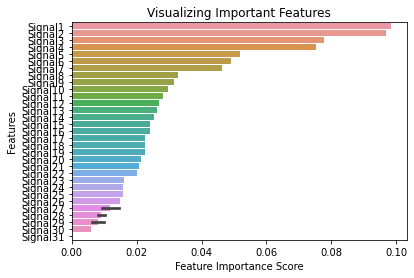

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_cols)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()


In [ ]:
# Number of trees in random forest
n_estimators = np.linspace(100, 3000, int((3000-100)/200) + 1, dtype=int)
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [1, 5, 10, 20, 50, 75, 100, 150, 200]
# Minimum number of samples required to split a node
# min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 9)]
min_samples_split = [1, 2, 5, 10, 15, 20, 30]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Criterion
criterion=['gini', 'entropy']
random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'criterion': criterion}

In [ ]:
# a dictionary of values to choose from
{'n_estimators': np.array([ 100,  307,  514,  721,  928, 1135, 1342, 1550, 1757, 1964, 2171,
        2378, 2585, 2792, 3000]),
 'max_depth': [1, 5, 10, 20, 50, 75, 100, 150, 200],
 'min_samples_split': [1, 2, 5, 10, 15, 20, 30],
 'min_samples_leaf': [1, 2, 3, 4],
 'bootstrap': [True, False],
 'criterion': ['gini', 'entropy']}

{'n_estimators': array([ 100,  307,  514,  721,  928, 1135, 1342, 1550, 1757, 1964, 2171,
        2378, 2585, 2792, 3000]),
 'max_depth': [1, 5, 10, 20, 50, 75, 100, 150, 200],
 'min_samples_split': [1, 2, 5, 10, 15, 20, 30],
 'min_samples_leaf': [1, 2, 3, 4],
 'bootstrap': [True, False],
 'criterion': ['gini', 'entropy']}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rf_base = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf_base,
                               param_distributions = random_grid,
                               n_iter = 30, cv = 5,
                               verbose=2,
                               random_state=42, n_jobs = 4)
rf_random.fit(X_train, y_train)

In [89]:
rf_random.best_params_

{'n_estimators': 1964,
 'min_samples_split': 30,
 'min_samples_leaf': 2,
 'max_depth': 5,
 'criterion': 'entropy',
 'bootstrap': False}

In [106]:

print(rf_random.score(X_test, y_test))

0.9716981132075472
